In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


#### Generate Data

In [20]:
X_train = np.linspace(-1, 1, 20) 
# from -1 to 1, give me 20 equally spaced numbers

In [21]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [22]:
X_test = np.linspace(-1, 1, 20)

In [23]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

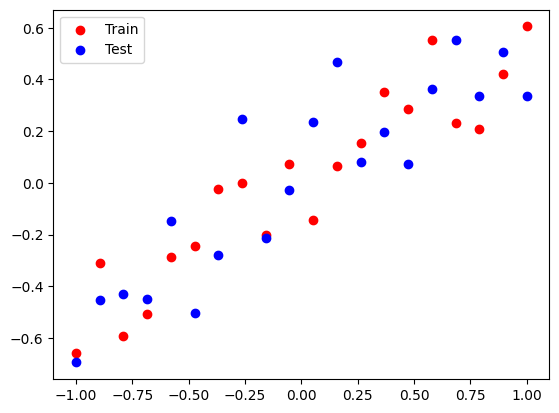

In [24]:
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.legend()
plt.show()

### Regression Model

In [27]:
model = Sequential()

model.add(Dense(128, input_dim=1, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))

adam = Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=adam, metrics=['mse'])

history = model.fit(X_train, y_train, epochs=500, validation_data= (X_test, y_test), verbose=False)

In [28]:
# evaluate the model
_, train_mse = model.evaluate(X_train, y_train, verbose=0)
_, test_mse = model.evaluate(X_test, y_test, verbose=0)
print(f'Train: {train_mse}, Test: {test_mse}')

Train: 0.004601431544870138, Test: 0.04439961910247803


In [29]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 111ms/step


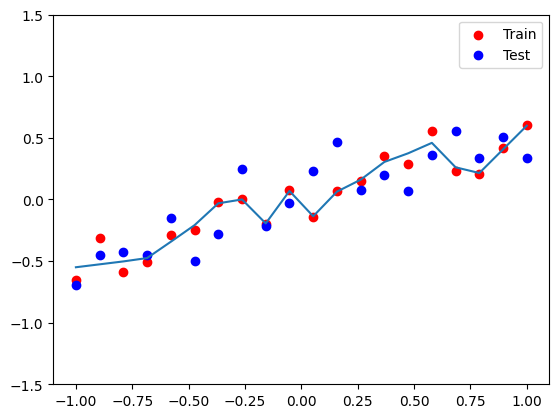

In [31]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

Our Regressor line is passing mostly by touching the red points, the training points. So it is depicting that Overfitting is happening

### Dropout Model

In [41]:
# n% dropout means n% of the neurons are to be turned off randomly each epoch
model_2 = Sequential()
model_2.add(Dense(128, input_dim=1, activation="relu"))
model_2.add(Dropout(0.5)) # we need this layer to have a 50% dropout
model_2.add(Dense(128, activation="relu"))
model_2.add(Dropout(0.5)) # we need this layer to have a 50% dropout
model_2.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_2.compile(loss='mse', optimizer=adam, metrics=['mse'])

drop_out_history = model_2.fit(X_train, y_train, epochs=500, validation_data = (X_test, y_test),verbose=False)

In [42]:
# evaluate the model
_, train_mse = model_2.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_2.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.016242485493421555, Test: 0.03750978782773018


In [43]:
y_pred_2 = model_2.predict(X_test)

1/1 [==============================] - 0s 59ms/step


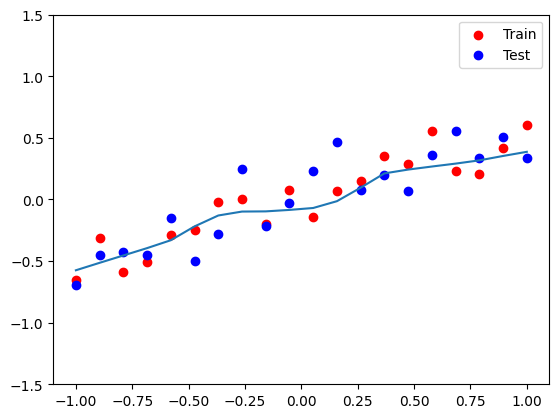

In [44]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

Here, our regressor line has smoothen out. It is not trying to capture every training point rather its trying to capture the data patterns. 